**Perceptron Learning Algorithm**

In [ ]:
# perceptron.py
import numpy as np
import pandas as pd

In [ ]:
class Perceptron(object):

    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        # X: training vectors, X.shape : [#samples, #features]
        # y : Target values, y.shape : [#samples]

        # weigths
        self.weight = np.zeros(1 + X.shape[1])

        # No. of misclassifications
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self


    def net_input(self, X):
        # Calculate net input
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        # return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Preprocessing Iris data set**

For our testing - Load two flower classes Setosa and Versicolor from the Iris data set

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.iloc[145:150,0:5]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.head()

extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively

In [ ]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

we want to convert the class labels into the two integer class labels 1 (for Versicolor) and -1 (for Setosa) 

In [ ]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

to extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples

In [ ]:
X = df.iloc[0:100, [0,3]].values
X

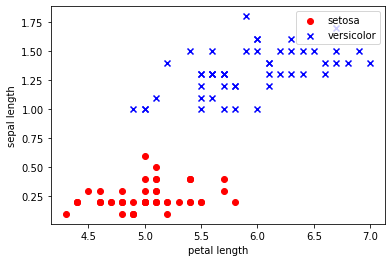

In [ ]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper right')
plt.show()

**Training the Perceptron Model**

 plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes

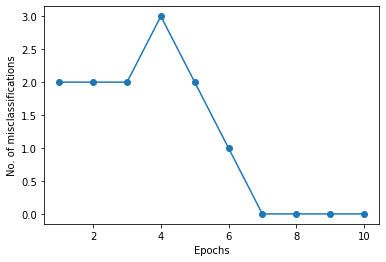

In [ ]:
# import Perceptron from perceptron.py

# from perceptron import Perceptron
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors)+1), pn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('No. of misclassifications')
plt.show()

Our perceptron converged after the sixth epoch. we are able to classify training samples perfectly

**Visualize the decision boundaries**

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

in above code:
- we define a number of colors and markers and create a color map(ListedColormap)
- we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays xx1 and xx2(meshgrid function)
- we trained our perceptron classifier on two feature dimensions
-  we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset
- use the predict method to predict the class labels Z of the corresponding grid points.
- After reshaping the predicted class labels Z into a grid with the same dimensions as xx1 and xx2 , we can now draw a contour plot (matplotlib's contourf function) --> maps the different decision regions to different colors for each predicted class in the grid array:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


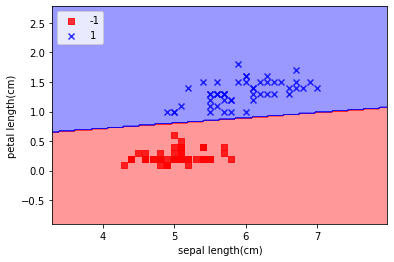

In [ ]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.legend(loc='upper left')
plt.show()

The perceptron learned a decision boundary that was able to classify all flower samples in the Iris training subset perfectly.

- but convergence is one of the biggest problems of the perceptron.